In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("police_deaths_USA_v6.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25623 entries, 0 to 25622
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          25623 non-null  object 
 1   Name          25623 non-null  object 
 2   Age           22946 non-null  float64
 3   End_Of_Watch  25623 non-null  object 
 4   Day_Of_Week   25623 non-null  object 
 5   Cause         25622 non-null  object 
 6   Department    25623 non-null  object 
 7   State         25623 non-null  object 
 8   Tour          17417 non-null  object 
 9   Badge         7477 non-null   object 
 10  Weapon        16263 non-null  object 
 11  Offender      13803 non-null  object 
 12  Summary       25623 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.5+ MB


In [4]:
# Check data types of all columns
print(df.dtypes)
df.info()
df.head()
df = df.astype({col: 'category' for col in df.select_dtypes(include='object').columns})
df["Name"] = df["Name"].astype("object")

Rank             object
Name             object
Age             float64
End_Of_Watch     object
Day_Of_Week      object
Cause            object
Department       object
State            object
Tour             object
Badge            object
Weapon           object
Offender         object
Summary          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25623 entries, 0 to 25622
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          25623 non-null  object 
 1   Name          25623 non-null  object 
 2   Age           22946 non-null  float64
 3   End_Of_Watch  25623 non-null  object 
 4   Day_Of_Week   25623 non-null  object 
 5   Cause         25622 non-null  object 
 6   Department    25623 non-null  object 
 7   State         25623 non-null  object 
 8   Tour          17417 non-null  object 
 9   Badge         7477 non-null   object 
 10  Weapon        16263 non-null  object 
 11  O

In [ ]:
# show numerical variables
df.describe()

,Age
count,22946.000000
mean,40.289419
std,15.799729
min,17.000000
25%,31.000000
50%,39.000000
75%,48.000000
max,1661.000000


To check: Unique count of non-numeric data
Rank              618
End_Of_Watch    18845
Day_Of_Week         7
Cause              36
Department       7229
State              58
Tour              369
Badge            4076
Weapon            136
Offender         1763
Summary         25590
dtype: int64
Top 5 unique values of Rank
            Count  count
0       Patrolman   3841
1  Police Officer   3514
2  Deputy Sheriff   3215
3         Officer   1699
4        Sergeant   1420
 
Top 5 unique values of Name
             Count  count
0    William Smith      3
1  George Williams      3
2      John Wilson      3
3    James O'Brien      3
4    George Rogers      3
 
Top 5 unique values of End_Of_Watch
        Count  count
0  2001-09-11     72
1  1870-04-27     11
2  1837-11-10     10
3  1917-11-24     10
4  1995-04-19      9
 
Top 5 unique values of Day_Of_Week
      Count  count
0  Saturday   4002
1    Sunday   3765
2    Friday   3740
3  Thursday   3620
4   Tuesday   3517
 
Top 5 unique values o

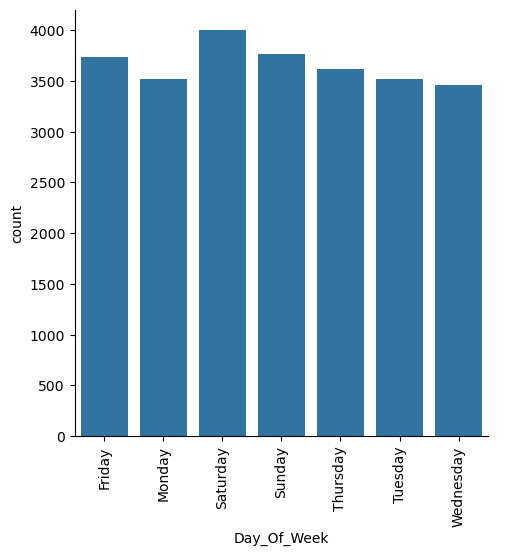

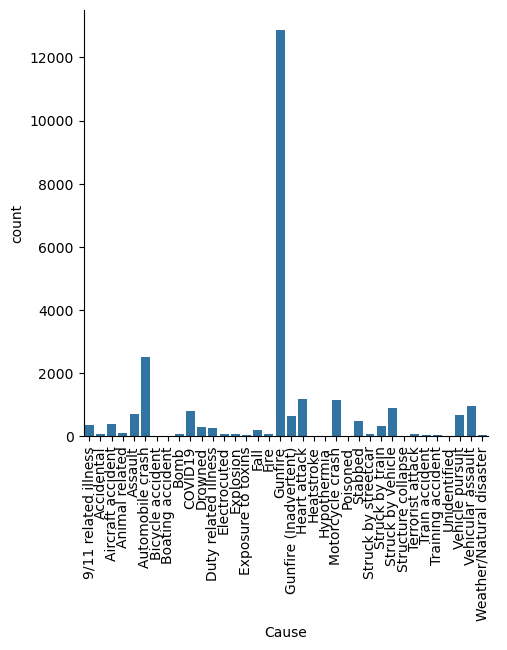

In [6]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        unique_count = df[col].nunique()
        # plot histograms
        if unique_count < 50:
            fig = sns.catplot(x=col, kind="count", data=df)
            fig.set_xticklabels(rotation=90)
            plt.show()

categorical_eda(df)


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Age,22946.0,40.289419,15.799729,17.0,31.0,39.0,48.0,1661.0


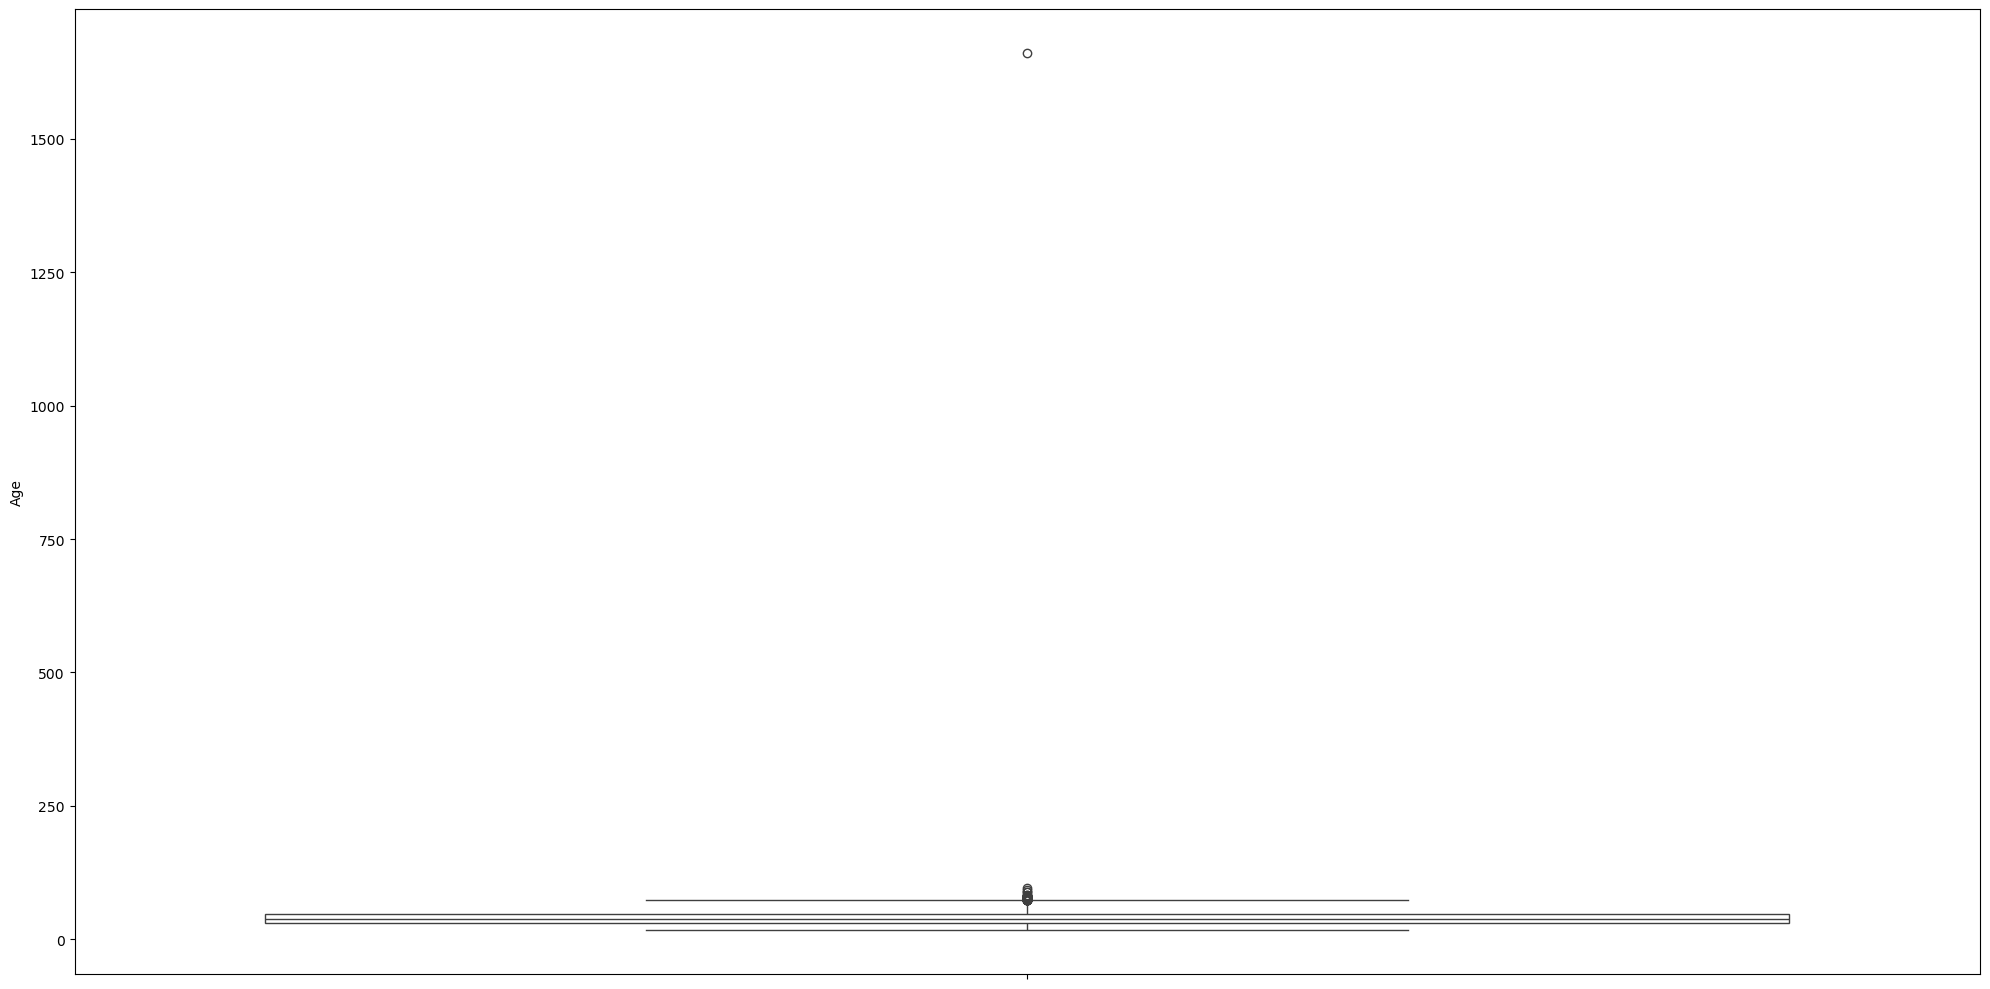

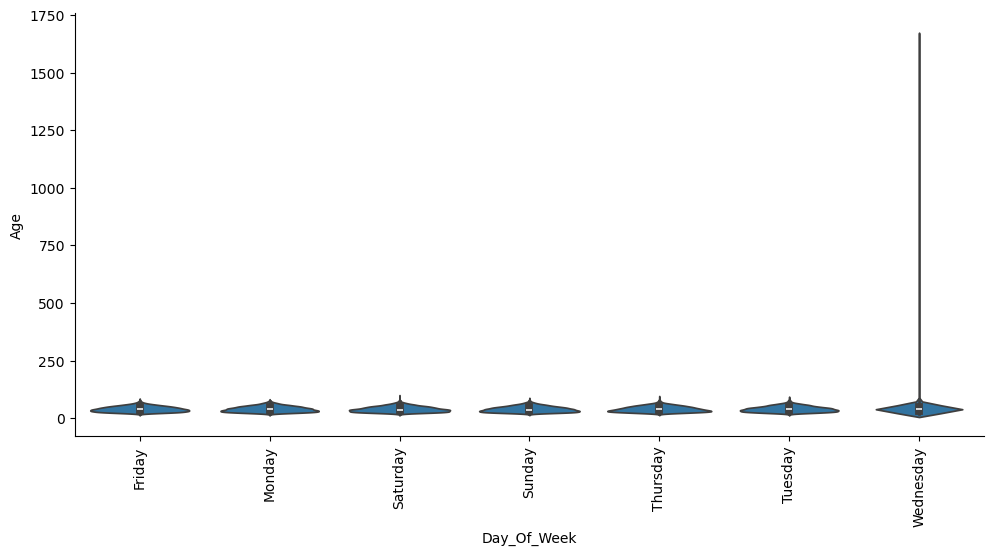

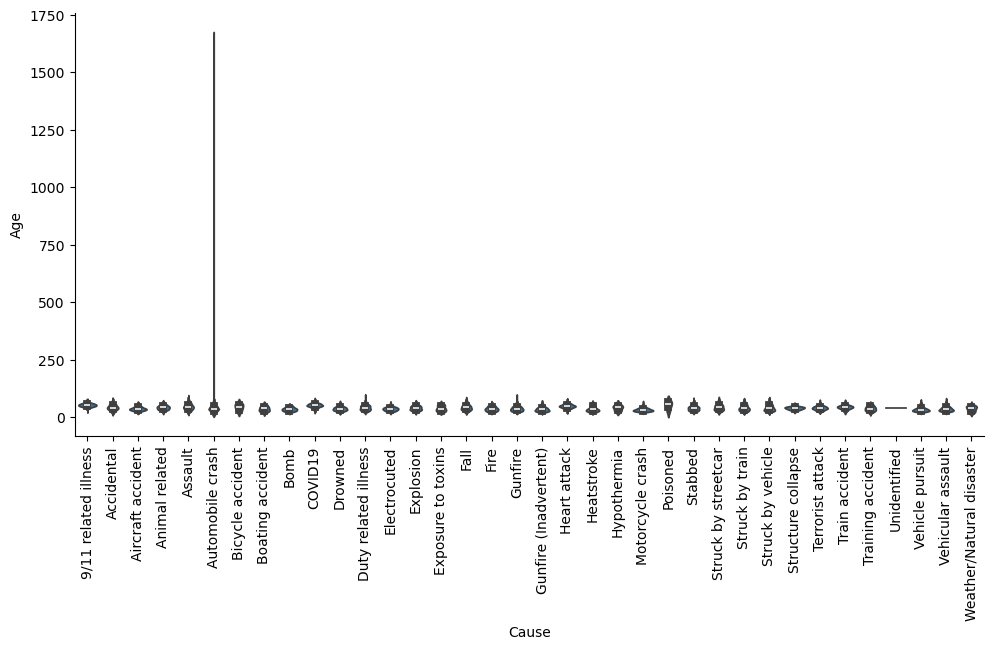


To check pairwise joint distribution of numeric data


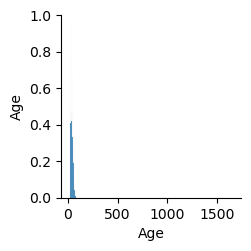

In [7]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                unique_count = df[col].nunique()
                # plot histograms
                if unique_count < 50:
                    fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                    fig.set_xticklabels(rotation=90)
                    plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()

numeric_eda(df)